In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

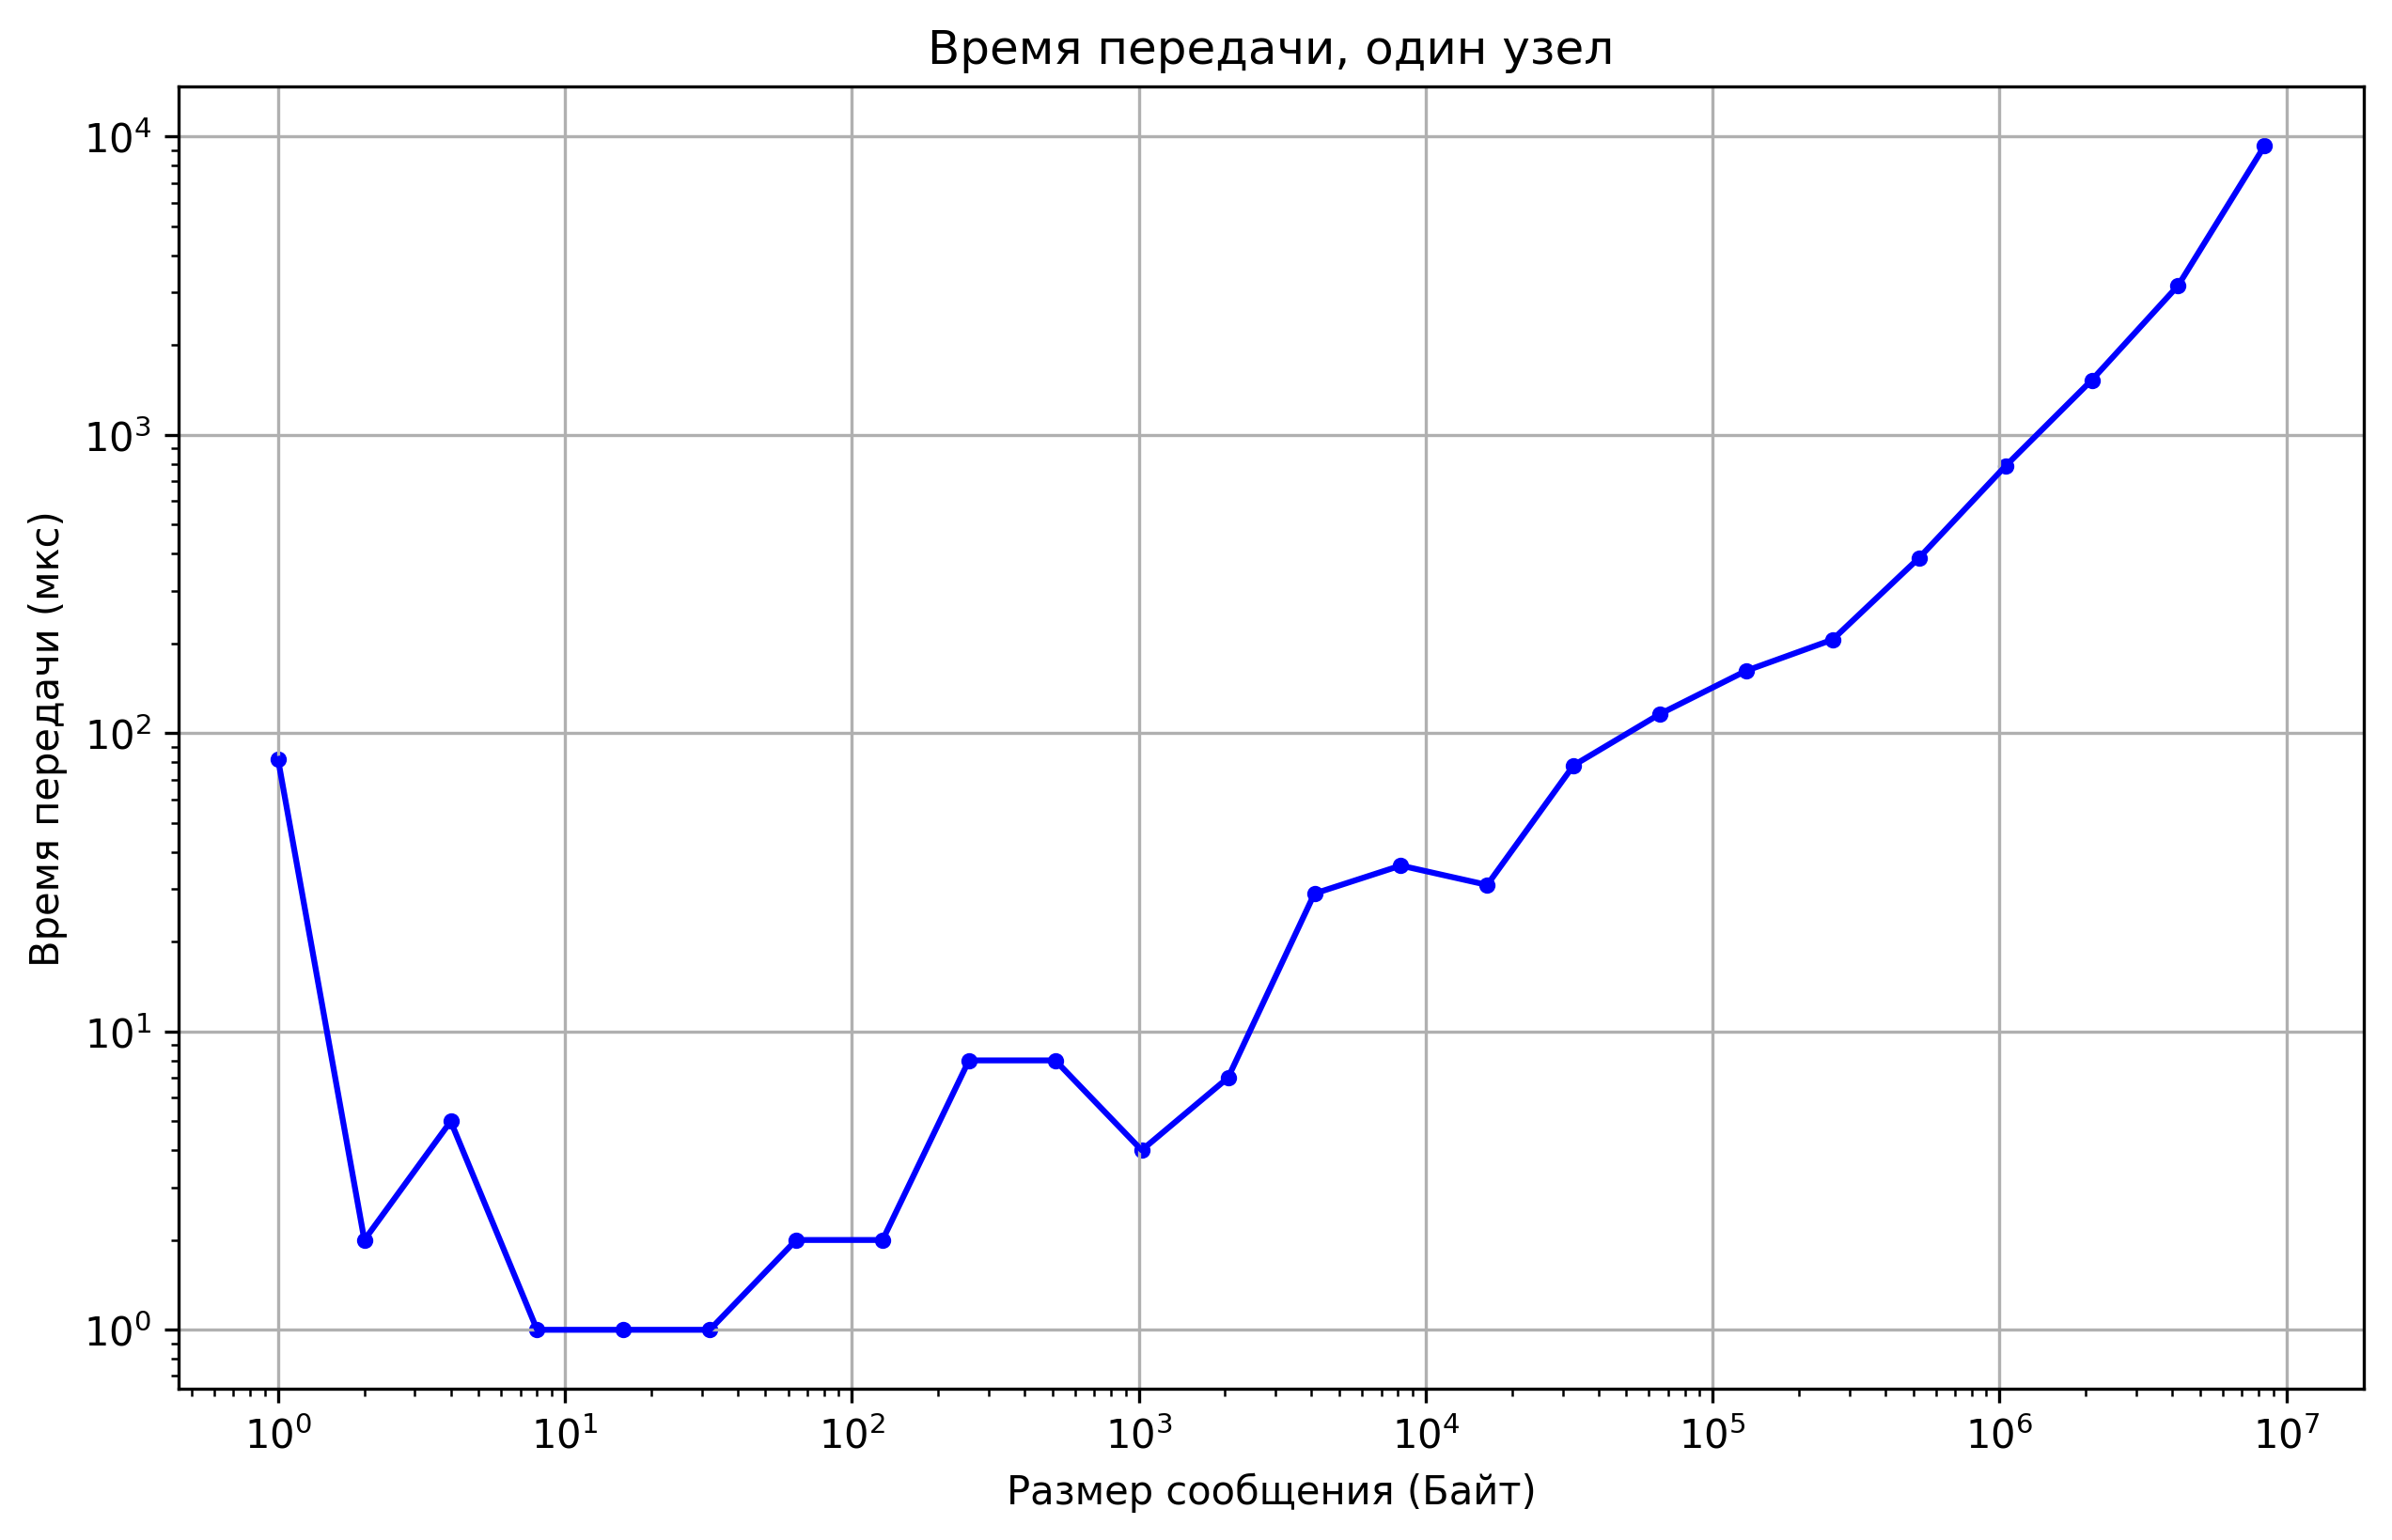

In [123]:
# Read the CSV file
data = pd.read_csv('out_single.csv')

# Extract Buffer Size and Send-Receive Time from the CSV
buffer_size = np.array(data['Buffer'])
send_receive_time = np.array(data['Time']) * 1000000
bandwidth = buffer_size / send_receive_time

# Create a plot
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(buffer_size, send_receive_time, linestyle='-', color='b')
plt.scatter(buffer_size, send_receive_time, color='b', s=10)

# Add labels and title
plt.xlabel('Размер сообщения (Байт)')
plt.ylabel('Время передачи (мкс)')
plt.title('Время передачи, один узел')

# Add grid
plt.grid(True)

# Set log scale for the x-axis (optional, since buffer sizes can grow exponentially)
plt.xscale('log')
plt.yscale('log')

# Show the plot
plt.savefig('transfer_time_single_node.png')

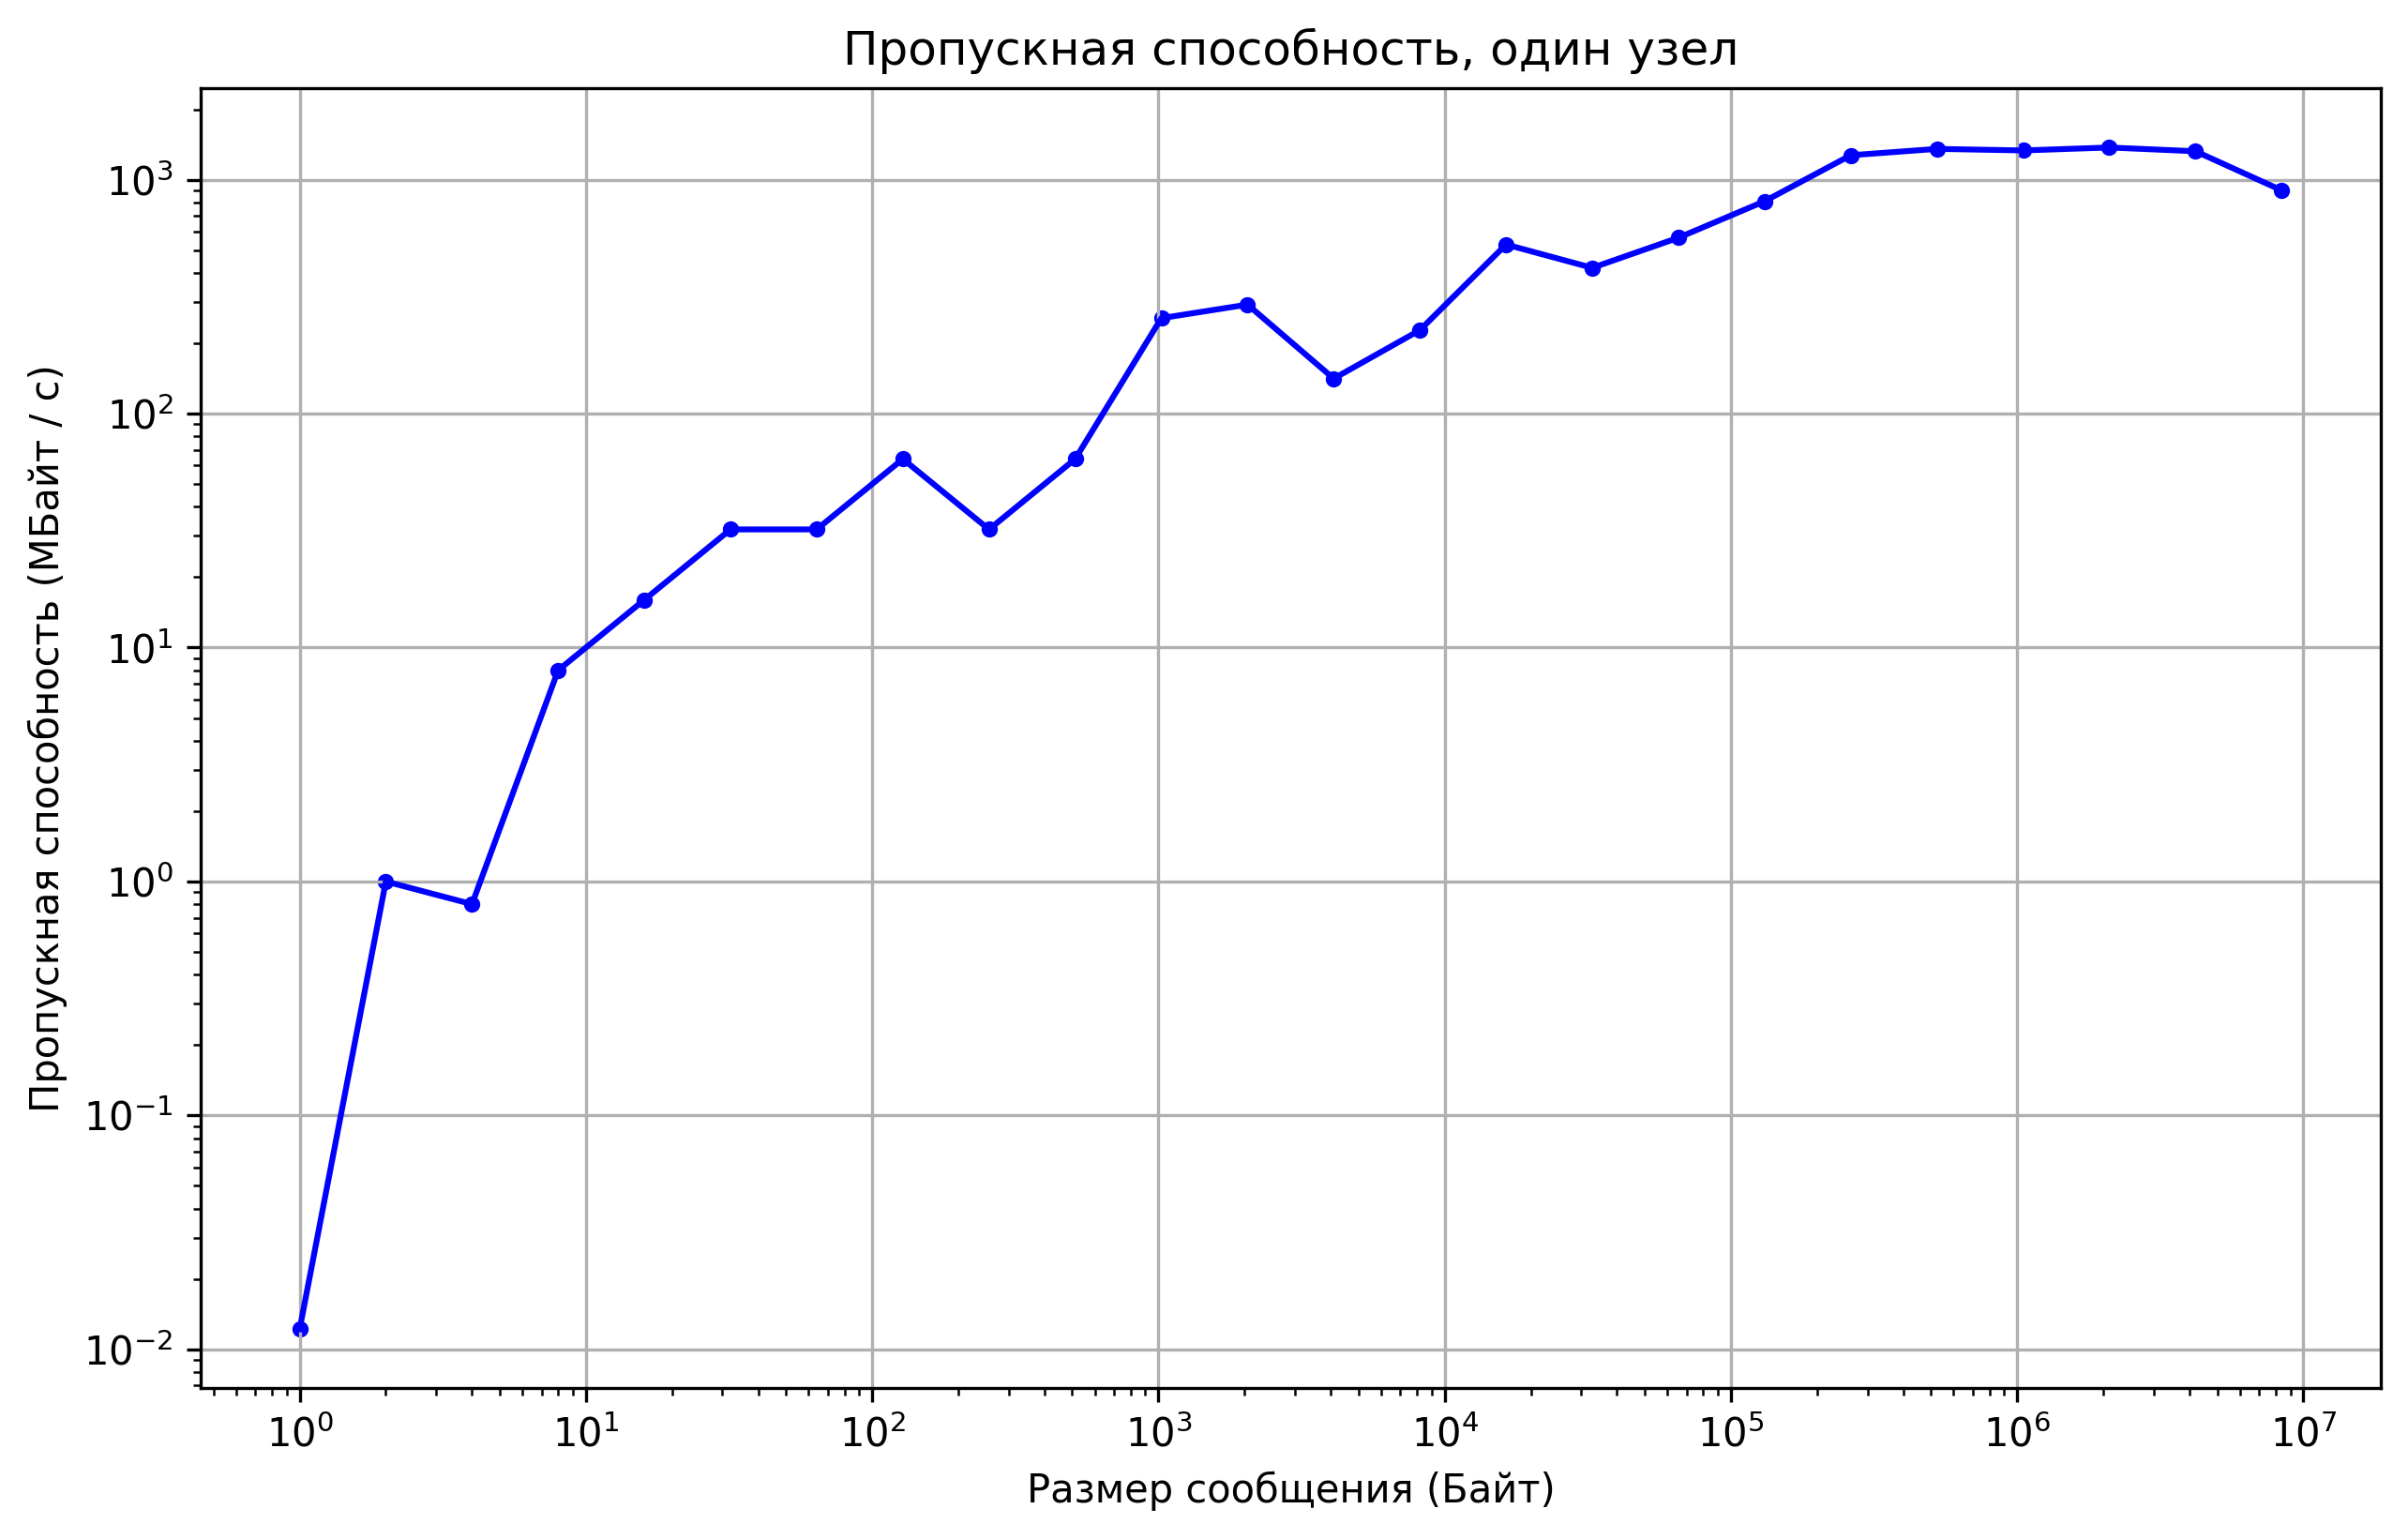

In [124]:
# Create a plot
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(buffer_size, bandwidth, linestyle='-', color='b')
plt.scatter(buffer_size, bandwidth, color='b', s=10)

# Add labels and title
plt.xlabel('Размер сообщения (Байт)')
plt.ylabel('Пропускная способность (МБайт / с)')
plt.title('Пропускная способность, один узел')

# Add grid
plt.grid(True)

# Set log scale for the x-axis (optional, since buffer sizes can grow exponentially)
plt.xscale('log')
plt.yscale('log')

# Show the plot
plt.savefig('bandwidth_single_node.png')

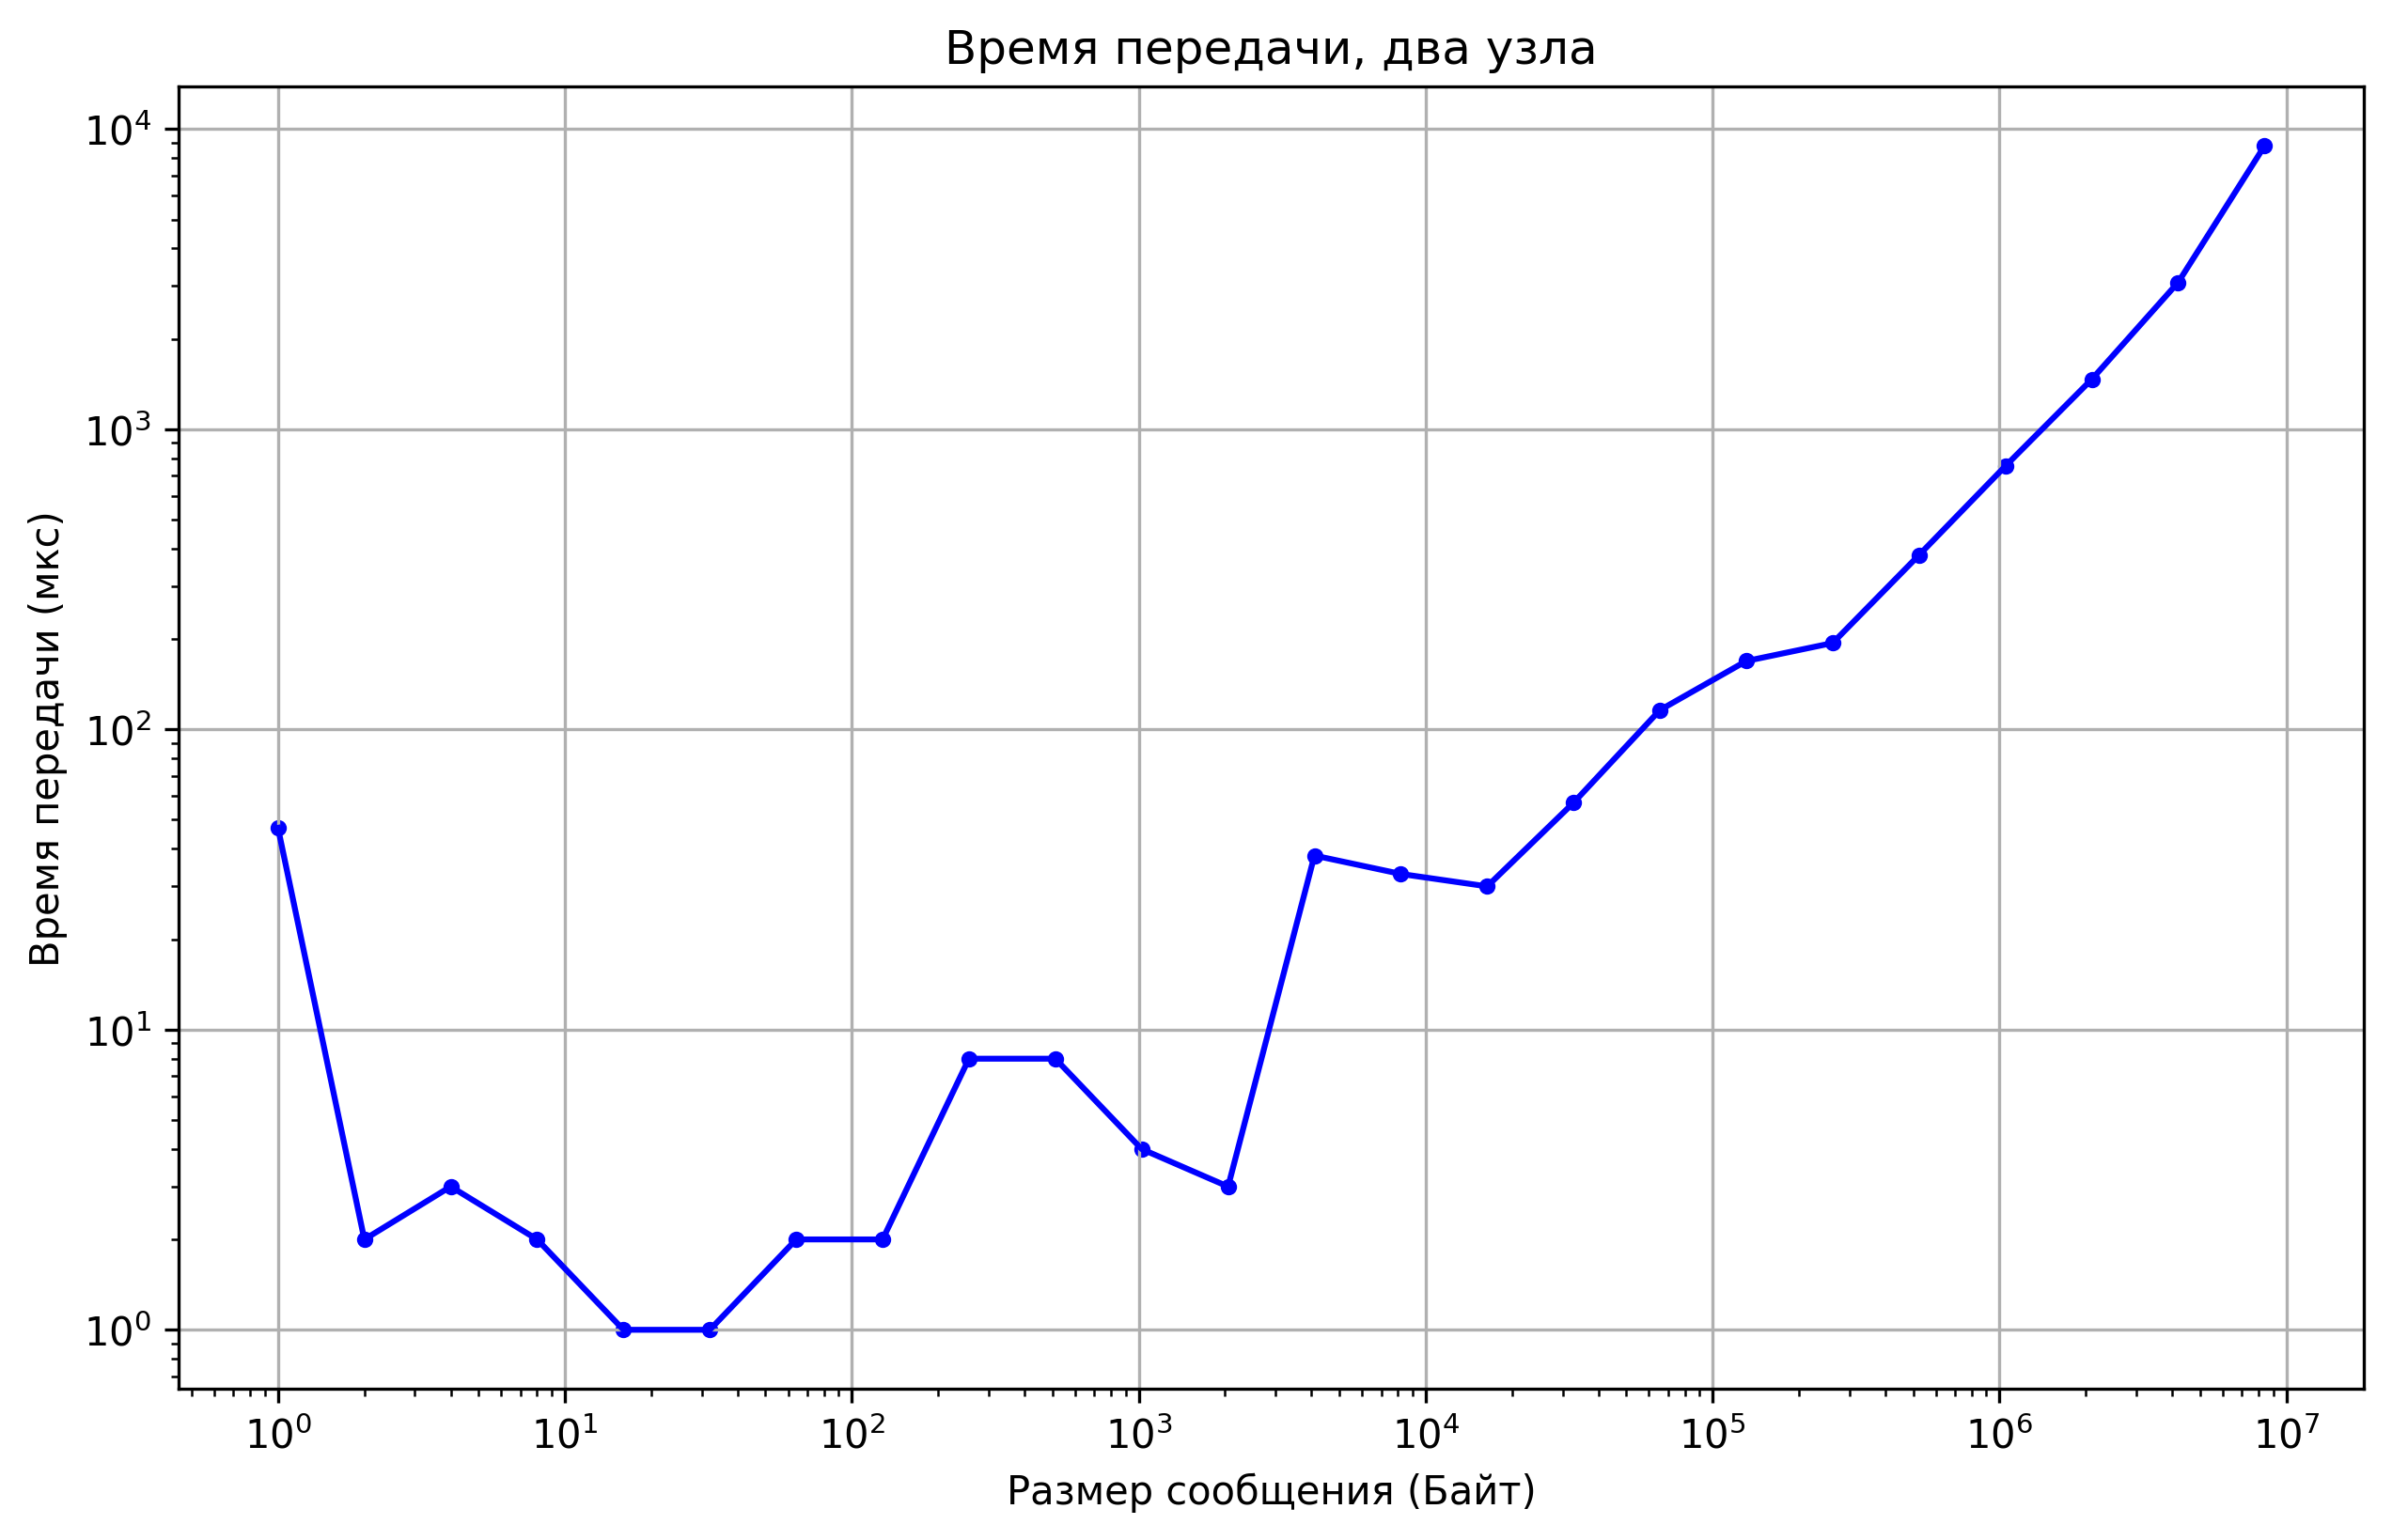

In [125]:
# Read the CSV file
data = pd.read_csv('out_mult.csv')

# Extract Buffer Size and Send-Receive Time from the CSV
buffer_size = np.array(data['Buffer'])
send_receive_time = np.array(data['Time']) * 1000000
bandwidth = buffer_size / send_receive_time

# Create a plot
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(buffer_size, send_receive_time, linestyle='-', color='b')
plt.scatter(buffer_size, send_receive_time, color='b', s=10)

# Add labels and title
plt.xlabel('Размер сообщения (Байт)')
plt.ylabel('Время передачи (мкс)')
plt.title('Время передачи, два узла')

# Add grid
plt.grid(True)

# Set log scale for the x-axis (optional, since buffer sizes can grow exponentially)
plt.xscale('log')
plt.yscale('log')

# Show the plot
plt.savefig('transfer_time_two_nodes.png')

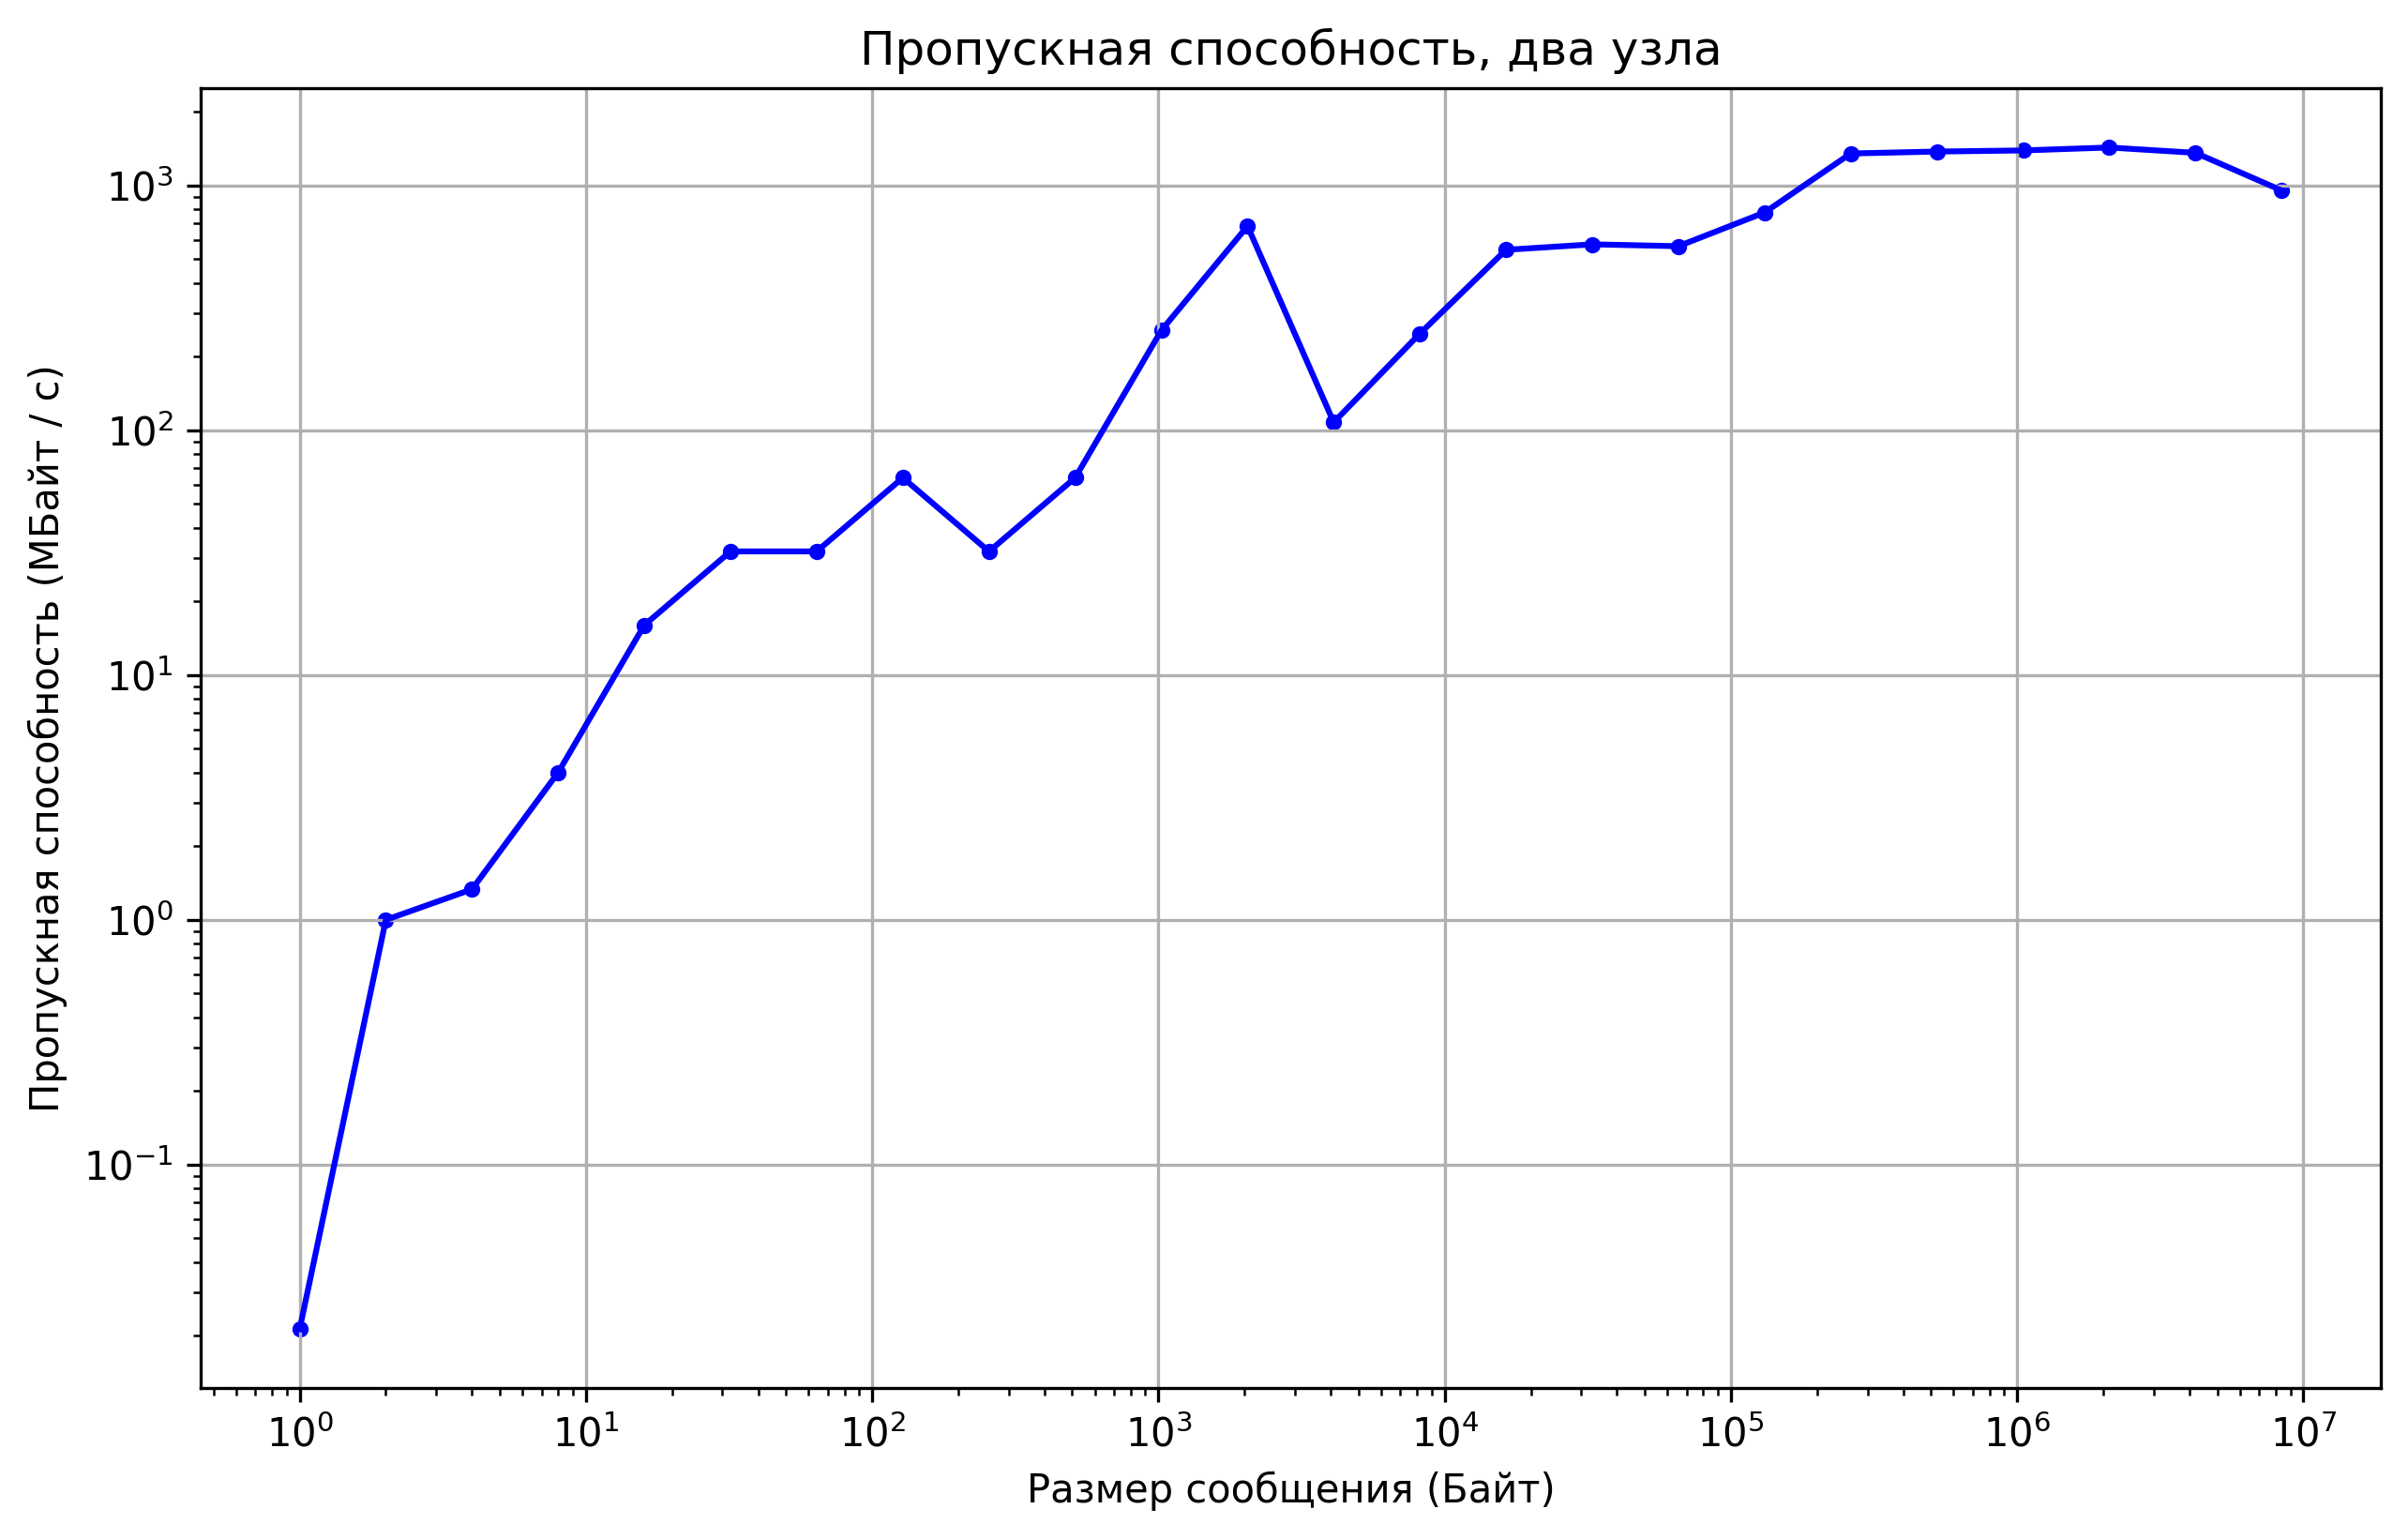

In [126]:
# Create a plot
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(buffer_size, bandwidth, linestyle='-', color='b')
plt.scatter(buffer_size, bandwidth, color='b', s=10)

# Add labels and title
plt.xlabel('Размер сообщения (Байт)')
plt.ylabel('Пропускная способность (МБайт / с)')
plt.title('Пропускная способность, два узла')

# Add grid
plt.grid(True)

# Set log scale for the x-axis (optional, since buffer sizes can grow exponentially)
plt.xscale('log')
plt.yscale('log')

# Show the plot
plt.savefig('bandwidth_two_nodes.png')

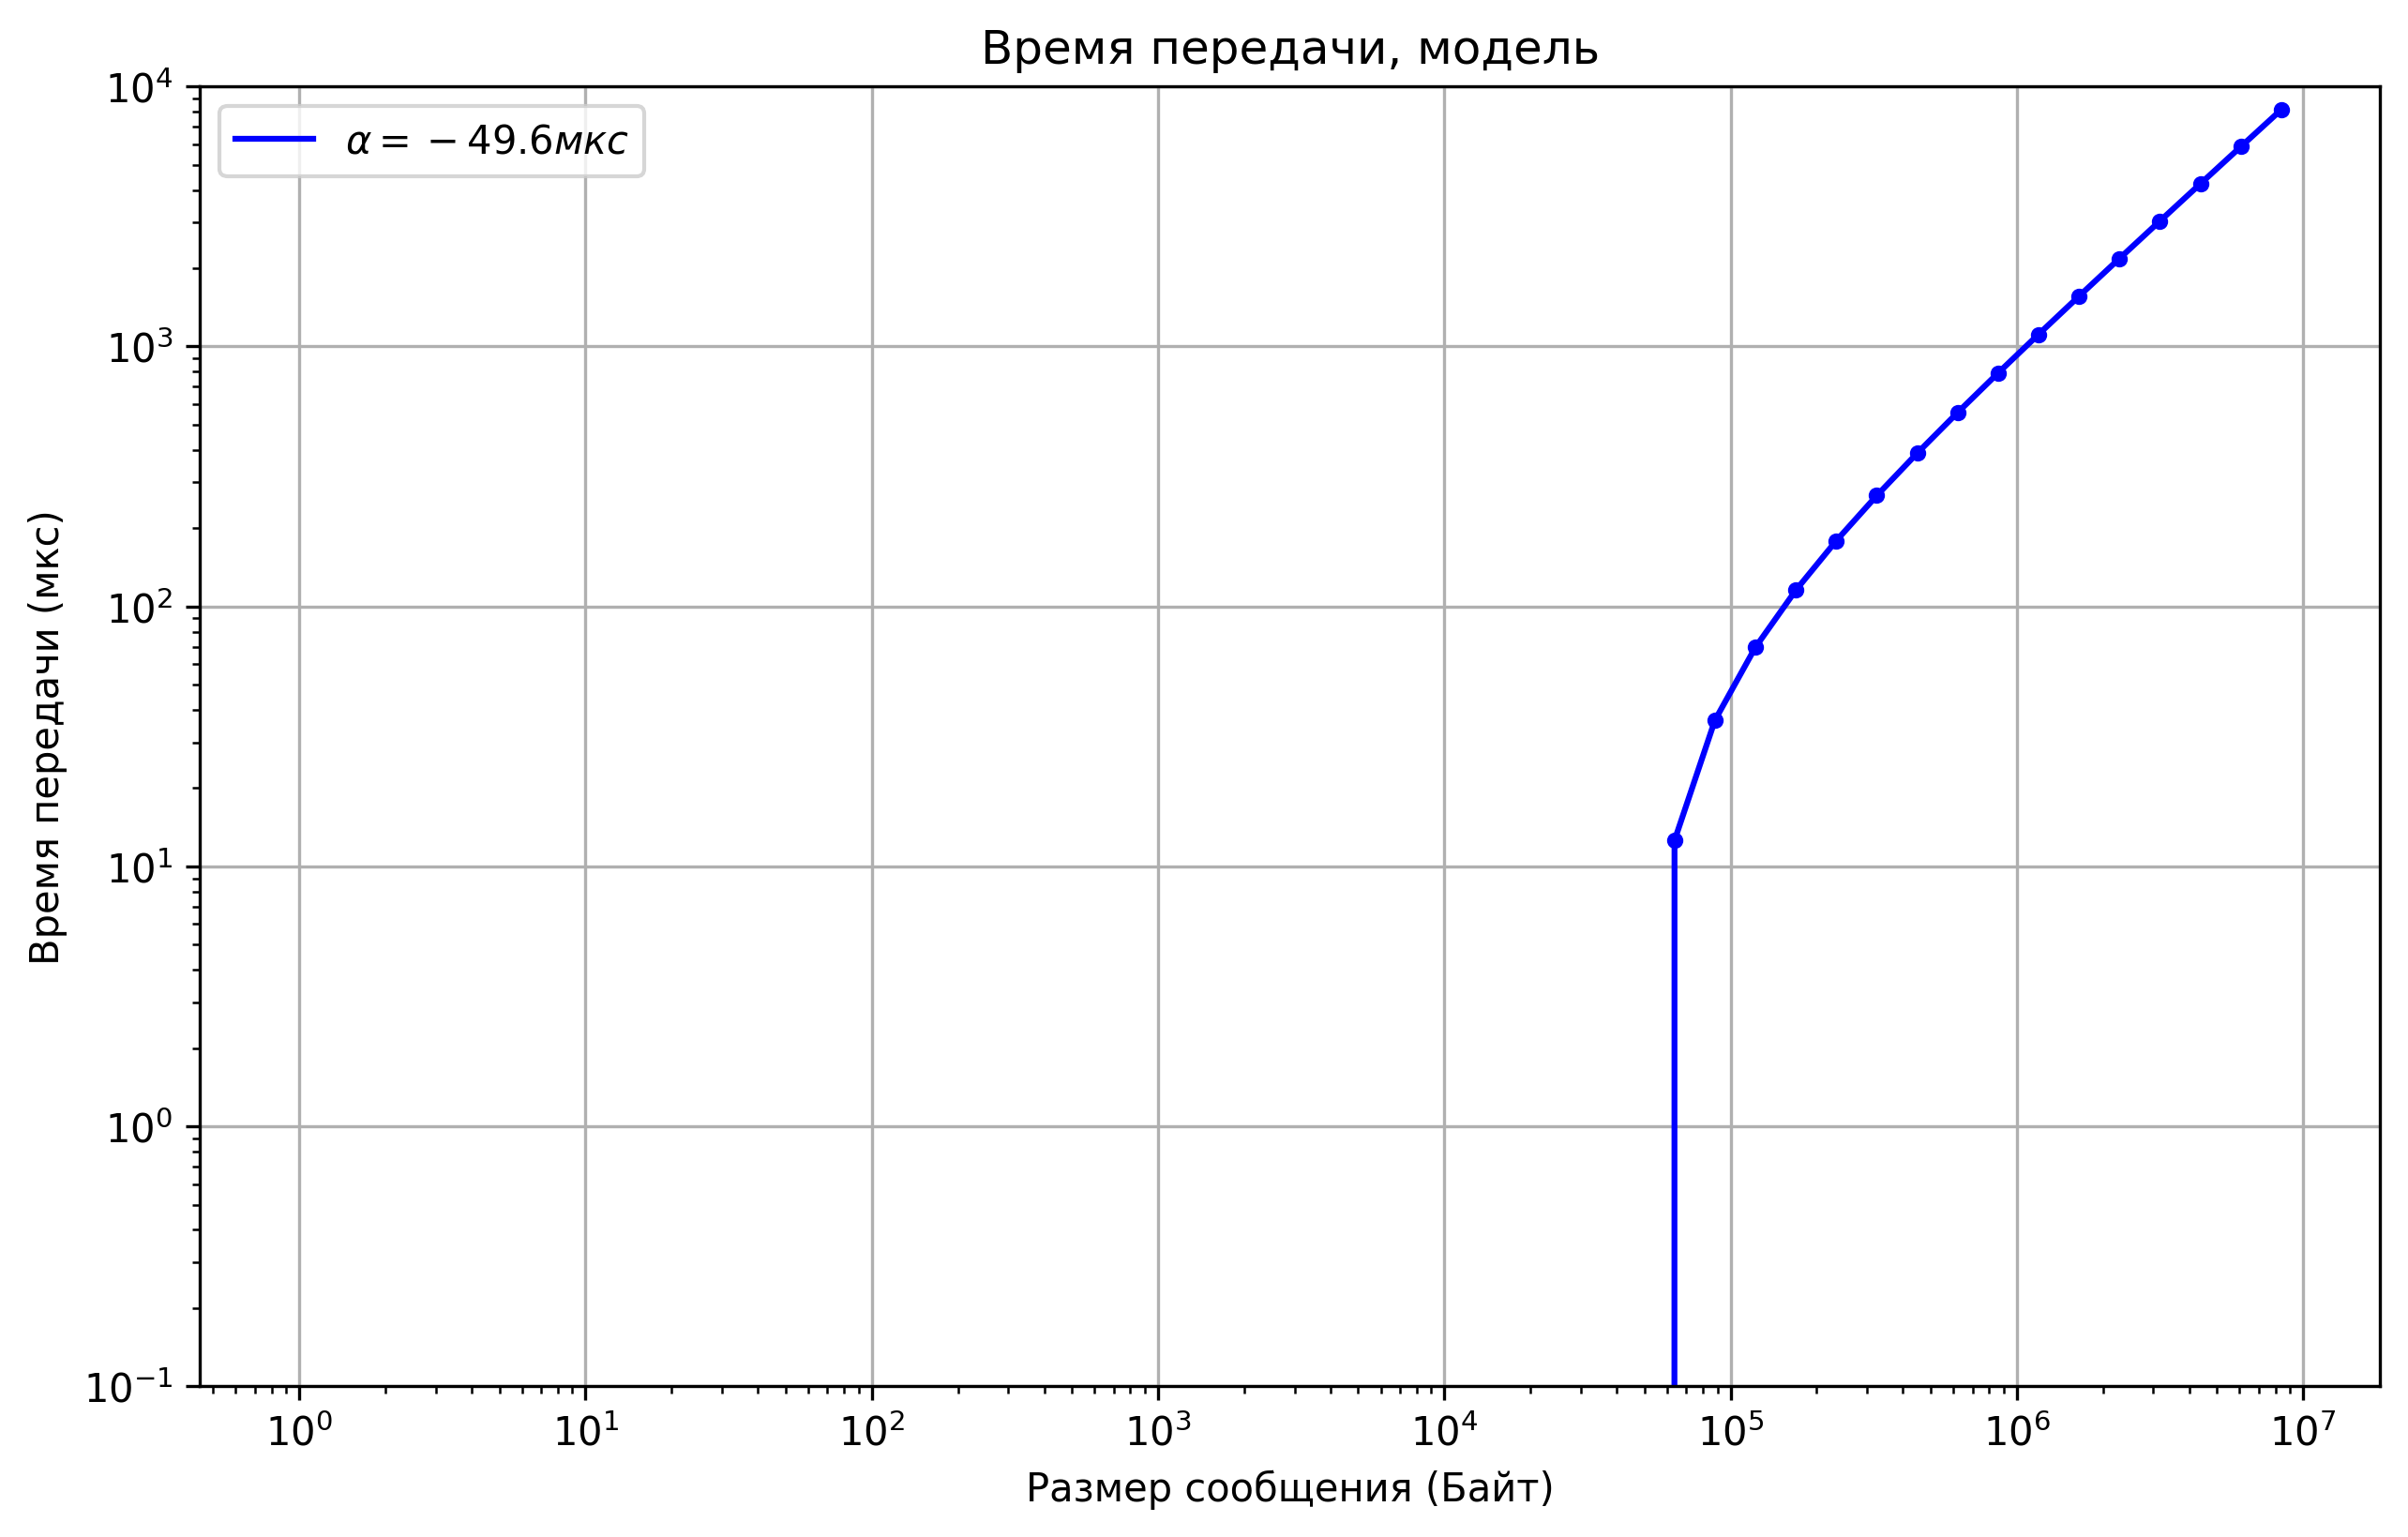

In [127]:
plf = np.polyfit(buffer_size, send_receive_time, 1)
buffer_space = np.logspace(0, 23, base = 2)

alpha = plf[1]
beta = plf[0]

t = alpha + beta * buffer_space
C = buffer_space / t

# Create a plot
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(buffer_space, t, linestyle='-', color='b', label = f'$\\alpha = {alpha:.1f} мкс$')
plt.scatter(buffer_space, t, color='b', s=10)

# Add labels and title
plt.xlabel('Размер сообщения (Байт)')
plt.ylabel('Время передачи (мкс)')
plt.title('Время передачи, модель')

# Add grid
plt.grid(True)

# Set log scale for the x-axis (optional, since buffer sizes can grow exponentially)
plt.xscale('log')
plt.yscale('log')
plt.ylim([1e-1, 1e4])
plt.legend()

# Show the plot
plt.savefig('transfer_time_model.png')

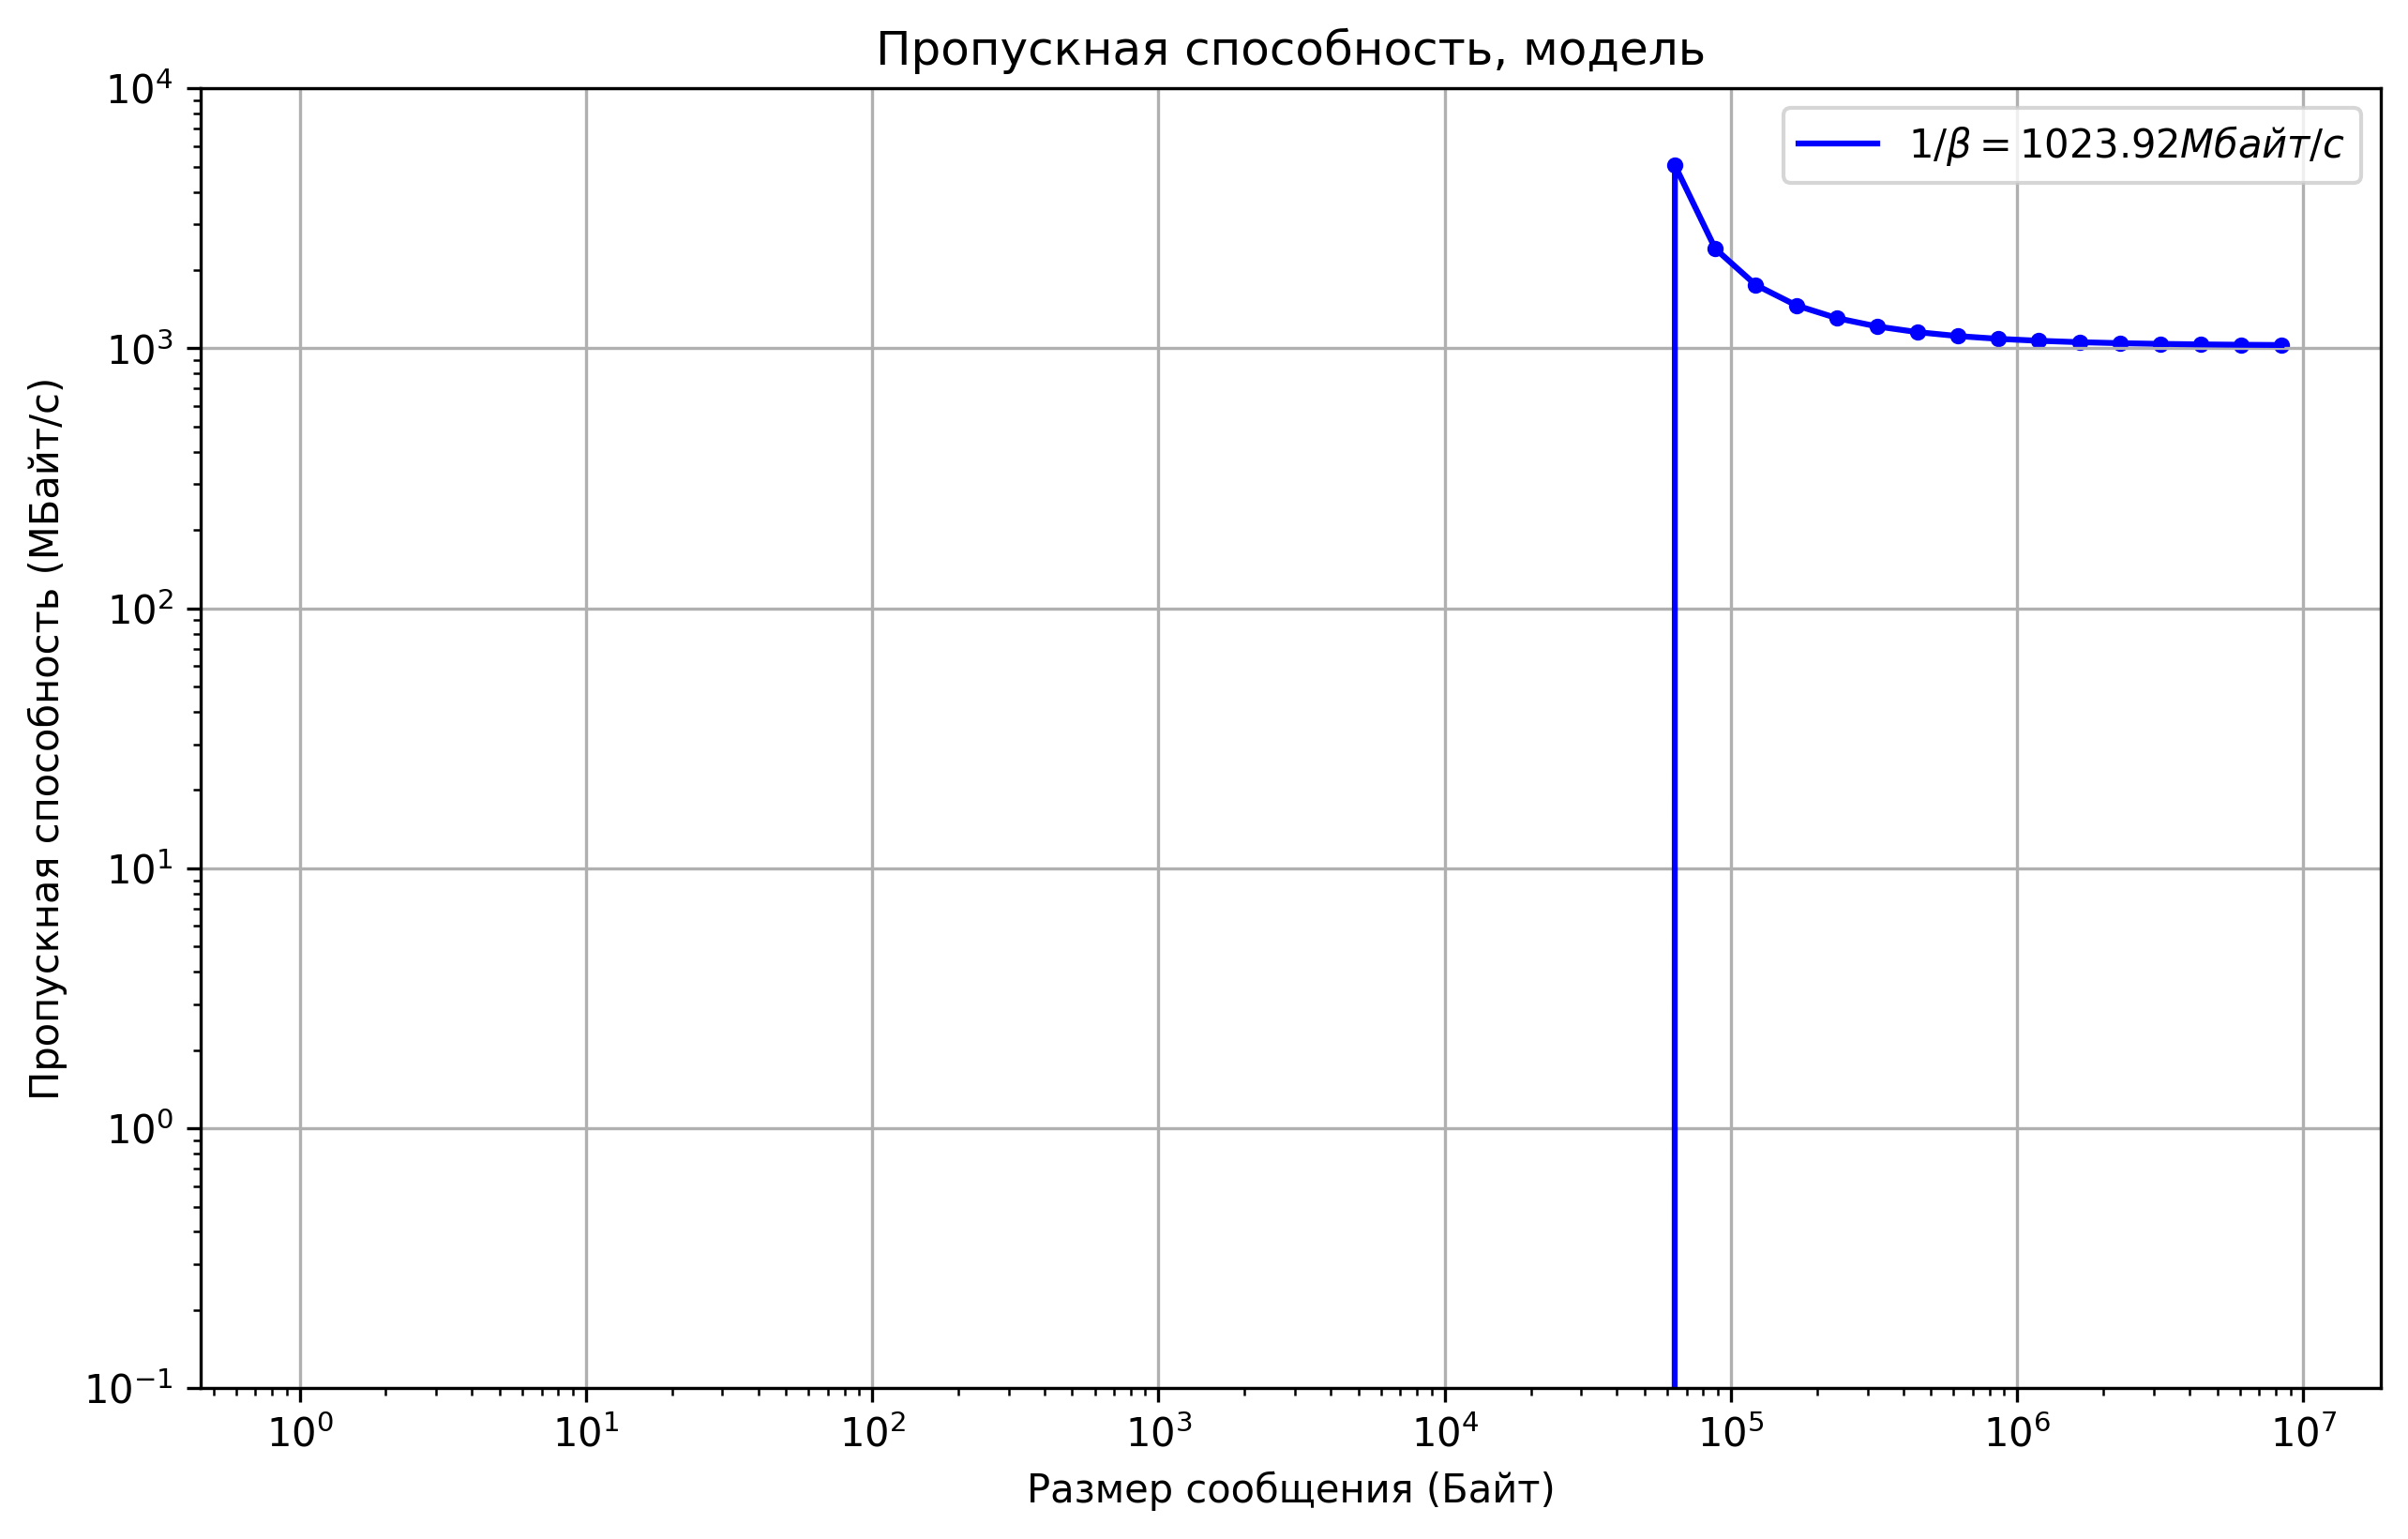

In [128]:
# Create a plot
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(buffer_space, C, linestyle='-', color='b', label = f'$1 / \\beta = {1 / beta :.2f} Мбайт/с$')
plt.scatter(buffer_space, C, color='b', s=10)

# Add labels and title
plt.xlabel('Размер сообщения (Байт)')
plt.ylabel('Пропускная способность (МБайт/с)')
plt.title('Пропускная способность, модель')

# Add grid
plt.grid(True)

# Set log scale for the x-axis (optional, since buffer sizes can grow exponentially)
plt.xscale('log')
plt.yscale('log')
plt.ylim([1e-1, 1e4])
plt.legend()

# Show the plot
plt.savefig('bandwidth_model.png')